In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp_image

In [60]:
image = mp_image.imread('vanmieu.png')

In [61]:
image.shape

(240, 360, 4)

In [62]:
image = image[:, :, :3]

In [63]:
image.shape

(240, 360, 3)

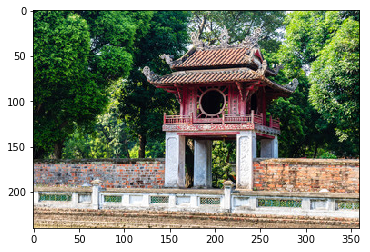

In [64]:
plt.imshow(image)
plt.show()

In [72]:
def filter_image(kernel, image):
    filtered_image = np.zeros((image.shape[0] - 2, image.shape[1] - 2, image.shape[2]))
    for i in range(filtered_image.shape[0] - 1):
        for j in range(filtered_image.shape[1] - 1):
            for k in range(filtered_image.shape[2]):
                new_value = np.sum(image[i:(i+3), j:(j+3), k] * kernel)
                if new_value < 0:
                    new_value = 0.0
                elif new_value > 1:
                    new_value = 1.0
                filtered_image[i, j, k] = new_value
    return filtered_image

In [108]:
edge_detect_kernel_1 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
edge_detect_kernel_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
edge_detect_kernel_3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

blur_kernel_1 = np.ones((3, 3))/9
blur_kernel_2 = np.ones((3, 3))/9

sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

kernels = [edge_detect_kernel_1, edge_detect_kernel_2, edge_detect_kernel_3,
           blur_kernel_1, blur_kernel_2,
           sharpen_kernel
          ]

In [109]:
def plot_filter_image(kernel, image):
    plt.figure(figsize=(9, 3))
    plt.subplot(121)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(filter_image(kernel, image))
    plt.axis('off')
    plt.show()

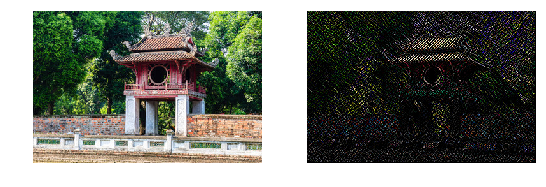

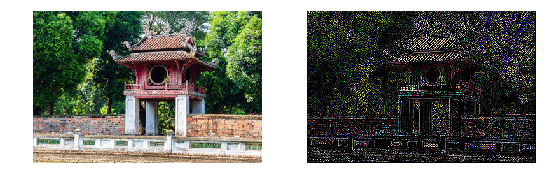

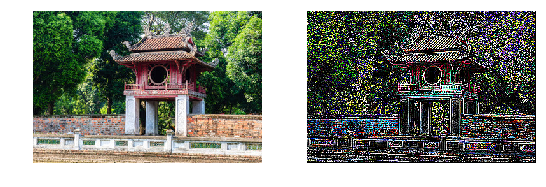

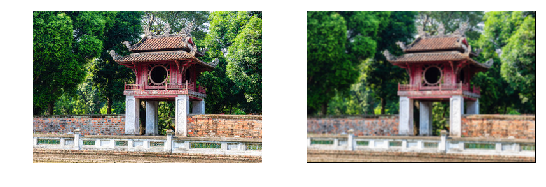

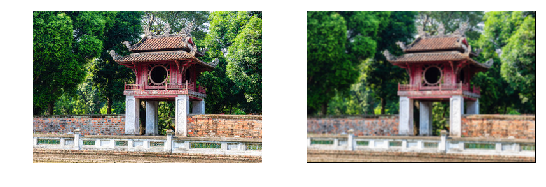

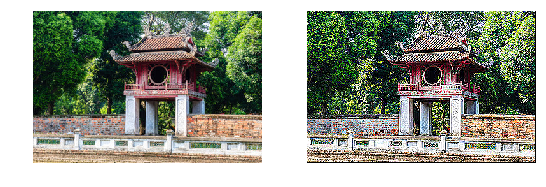

In [110]:
for kernel in kernels:
    plot_filter_image(kernel, image)